# Imputation
### Goal: impute the first 5 elements of y_1.

In [119]:
%pip install tensorly

import numpy as np
import tensorly as tl
import matplotlib.pyplot as plt
from tensorly.decomposition import parafac

y_1 = np.array([0, 0, 0, 0, 0, 2.7, 7.74,  6.24, 8.32,  8.75, 11.46, 8.94, 11.68, 12.62, 15.13, 13.9, 15.83, 16.12, 18.04, 19.58, 18.9, 22.14, 22.9,  23.5, 24.9, 24.32, 25.88, 26.06, 27.73, 29.53, 29.31, 30.6, 31.31, 32.15, 33.33, 34.99])
y_2 = np.array([-1.12,  1.23,  3.66,  3.74,  3.81,  4.11,  5.25,  8.69,  8.05,  8.36, 10.19, 13.1,  12.12, 13.62, 14.3,  14.65, 14.86, 16.65, 17.79, 19.59, 20.84, 21.93, 22.29, 23.89,  23.25, 26.25, 26.51, 26.7,  28.49, 28.92, 31.13, 32.52, 34.19, 31.6,  32.56, 34.5])
y_3 = np.array([0.16,  1.88,  2.32,  0.98,  3.69,  5.83,  6.23,  7.76,  7.78,  8.8,  10.19, 11.41,  12.2,  13.12, 13.33, 15.38, 16.12, 18.13, 19.2,  19.19, 19.62, 20.36, 22.42, 23.08,  23.66, 25.04, 25.38, 27.7,  27.55, 30.22, 30.4,  31.59, 30.91, 33.17, 34.74, 34.05]) 
y_4 = np.array([-0.27,  1.03,  0.63,  3.32,  4.85,  4.14,  6.35,  5.69,  7.96,  7.38, 11.12, 11.41,  11.98, 12.22, 15.27, 16.97, 14.14, 18.24, 19.63, 19.34, 18.8,  21.86, 21.82, 22.4,  22.77, 25.55, 26.79, 26.38, 28.52, 27.86, 30.8,  31.05, 31.81, 32.9,  34.87, 35.75])
y_5 = np.array([0.53,  1.14,  2.08,  3.62,  4.23,  5.68,  5.69,  4.57,  9.04, 11.19, 10.44, 10.9,  11.86, 12.88, 14.02, 13.88, 15.48, 16.0, 18.25, 18.7,  20.5,  20.83, 22.99, 23.21,  26.19, 23.1,  25.35, 27.9,  30.53, 28.75, 30.04, 30.77, 33.33, 32.71, 34.68, 34.68])

In [71]:
y = np.append(y_1,y_2)
y = np.append(y,y_3)
y = np.append(y,y_4)
y = np.append(y,y_5)
print("Observation length:", len(y))
print("Observation summary:", y.sum())

Observation length: 180
Observation summary: 3153.4800000000005


### For the best prediction model assume L = 13, but for the convinience let assume L = 12.

In [72]:
L = 12
P = np.array([y[L*i:L*(i+1)] for i in range (0, int(len(y)/L))]).T
U, S, V = np.linalg.svd(P, full_matrices=False)
print('Page matrix and its SVD-decomposition:\n')
print(P, '\n\n', U, '\n\n', np.diag(S), '\n\n', V)

Page matrix and its SVD-decomposition:

[[ 0.   11.68 24.9  -1.12 12.12 23.25  0.16 12.2  23.66 -0.27 11.98 22.77
   0.53 11.86 26.19]
 [ 0.   12.62 24.32  1.23 13.62 26.25  1.88 13.12 25.04  1.03 12.22 25.55
   1.14 12.88 23.1 ]
 [ 0.   15.13 25.88  3.66 14.3  26.51  2.32 13.33 25.38  0.63 15.27 26.79
   2.08 14.02 25.35]
 [ 0.   13.9  26.06  3.74 14.65 26.7   0.98 15.38 27.7   3.32 16.97 26.38
   3.62 13.88 27.9 ]
 [ 0.   15.83 27.73  3.81 14.86 28.49  3.69 16.12 27.55  4.85 14.14 28.52
   4.23 15.48 30.53]
 [ 2.7  16.12 29.53  4.11 16.65 28.92  5.83 18.13 30.22  4.14 18.24 27.86
   5.68 16.   28.75]
 [ 7.74 18.04 29.31  5.25 17.79 31.13  6.23 19.2  30.4   6.35 19.63 30.8
   5.69 18.25 30.04]
 [ 6.24 19.58 30.6   8.69 19.59 32.52  7.76 19.19 31.59  5.69 19.34 31.05
   4.57 18.7  30.77]
 [ 8.32 18.9  31.31  8.05 20.84 34.19  7.78 19.62 30.91  7.96 18.8  31.81
   9.04 20.5  33.33]
 [ 8.75 22.14 32.15  8.36 21.93 31.6   8.8  20.36 33.17  7.38 21.86 32.9
  11.19 20.83 32.71]
 [11.46 22.9

### Calculate r-value, minimum at which the next formula > 0.9

In [73]:
print([(S[:r]).sum()/(S).sum() for r in range (1,L+1)])

[0.8264245351258532, 0.9009293057044697, 0.9181028827509188, 0.9346576251462575, 0.9498603860134296, 0.9610355045880795, 0.9708669206370799, 0.9801908207792257, 0.9886964885384424, 0.9937915596529616, 0.9982087230813049, 1.0]


In [74]:
r = 2
S_hat = S[:r]
S_hat = np.append(S_hat, [0] * (L-r))
print(np.diag(S_hat))

[[272.92862927   0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.        ]
 [  0.          24.60537417   0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.        ]
 [  0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.        ]
 [  0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.        ]
 [  0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.        ]
 [  0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.        ]
 [  0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.


### Set P = 175/180 as we need to impute 5 values

In [75]:
P = (len(y)-5)/len(y)
estimate = np.dot(U, np.dot(np.diag(S_hat),V))*(1/P)
imputation = np.append(estimate[0:L, 0], np.append(estimate[0:L, 1], estimate[0:L, 2]))
print(imputation)

[-1.67730077 -0.2736874   0.66664881  1.08939396  1.82184209  3.51099712
  5.7586678   6.07899685  7.6244427   8.91654773 10.80763563 11.22483661
 12.03042306 13.08143024 14.26055726 14.96490031 16.00617245 17.25396192
 18.9939557  19.68726309 20.82369581 21.77844316 23.39002997 24.05094721
 24.58195557 25.2478284  26.60122834 27.54249136 28.83128547 29.60009548
 30.7751995  31.79327556 32.48674889 33.07534262 34.34601278 35.20962942]


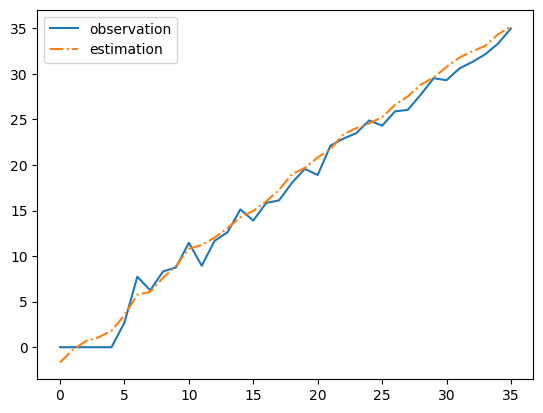

In [76]:
plt.plot(y[0:36], label ='observation');
plt.plot(imputation, '-.', label ='estimation');
plt.legend()
plt.show()

# Tensor Estimation
### Goal: impute the first 5 elements of y_1 using tensor estimation

In [131]:
L = 12
N = 5
P = np.zeros((N,L,len(y_1)-L+1))
y = np.array([y_1,y_2,y_3,y_4,y_5])
for n in range(N):
    for i in range(L):
        for j in range(len(y_1)-L+1):
            P[n, i, j] = y[n,(i + j)]

factors = parafac(P, rank = 2)
reconstruction = tl.cp_to_tensor(factors)
print(f"Imputation:\n {reconstruction[0,0:5,0]}\n")
print(f"Reconstructed tensor:\n {reconstruction}")

Imputation:
 [-1.7585928  -0.58134149  0.56797959  1.79433054  3.03437321]

Reconstructed tensor:
 [[[-1.75859280e+00 -7.29860871e-01  2.66991837e-01 ...  2.25887403e+01
    2.35247569e+01  2.45809043e+01]
  [-5.81341489e-01  4.46187784e-01  1.44364870e+00 ...  2.34790437e+01
    2.44215262e+01  2.54647542e+01]
  [ 5.67979586e-01  1.59617819e+00  2.59602397e+00 ...  2.43911611e+01
    2.53416536e+01  2.63741301e+01]
  ...
  [ 9.15394448e+00  1.01624552e+01  1.11561303e+01 ...  3.06300853e+01
    3.16176817e+01  3.25449128e+01]
  [ 1.03648783e+01  1.13706797e+01  1.23635499e+01 ...  3.15115707e+01
    3.25044620e+01  3.34169178e+01]
  [ 1.14109678e+01  1.24213567e+01  1.34202628e+01 ...  3.24344202e+01
    3.34382656e+01  3.43449522e+01]]

 [[ 1.51005488e-03  9.57152260e-01  1.88564798e+00 ...  2.22593519e+01
    2.31393851e+01  2.41042371e+01]
  [ 9.88731238e-01  1.95467810e+00  2.89467564e+00 ...  2.32694429e+01
    2.41653162e+01  2.51307567e+01]
  [ 1.95518063e+00  2.93293077e+00  3

# Matrix Estimation
### Goal: impute the first 5 elements of y_1 using matrix estimation

In [133]:
y_1 = np.array([0, 0, 0, 0, 0,  2.7,  7.74,  6.24,   8.32,  8.75, 11.46, 8.94,  11.68, 12.62, 15.13, 13.9,  15.83, 16.12, 18.04, 19.58, 18.9,  22.14, 22.9,  23.5, 24.9,  24.32, 25.88, 26.06, 27.73, 29.53, 29.31, 30.6,  31.31, 32.15, 33.33, 34.99])
y_2 = np.array([-1.12,  1.23,  3.66,  3.74,  3.81,  4.11,  5.25,  8.69,  8.05,  8.36, 10.19, 13.1,  12.12, 13.62, 14.3,  14.65, 14.86, 16.65, 17.79, 19.59, 20.84, 21.93, 22.29, 23.89,  23.25, 26.25, 26.51, 26.7,  28.49, 28.92, 31.13, 32.52, 34.19, 31.6,  32.56, 34.5])
y_3 = np.array([0.16,  1.88,  2.32,  0.98,  3.69,  5.83,  6.23,  7.76,  7.78,  8.8,  10.19, 11.41,  12.2,  13.12, 13.33, 15.38, 16.12, 18.13, 19.2,  19.19, 19.62, 20.36, 22.42, 23.08,  23.66, 25.04, 25.38, 27.7,  27.55, 30.22, 30.4,  31.59, 30.91, 33.17, 34.74, 34.05]) 
y_4 = np.array([-0.27,  1.03,  0.63,  3.32,  4.85,  4.14,  6.35,  5.69,  7.96,  7.38, 11.12, 11.41,  11.98, 12.22, 15.27, 16.97, 14.14, 18.24, 19.63, 19.34, 18.8,  21.86, 21.82, 22.4,  22.77, 25.55, 26.79, 26.38, 28.52, 27.86, 30.8,  31.05, 31.81, 32.9,  34.87, 35.75])
y_5 = np.array([0.53,  1.14,  2.08,  3.62,  4.23,  5.68,  5.69,  4.57,  9.04, 11.19, 10.44, 10.9,  11.86, 12.88, 14.02, 13.88, 15.48, 16.0, 18.25, 18.7,  20.5,  20.83, 22.99, 23.21,  26.19, 23.1,  25.35, 27.9,  30.53, 28.75, 30.04, 30.77, 33.33, 32.71, 34.68, 34.68])
Y = np.array([y_1,y_2,y_3,y_4,y_5])

### Build SVD-decomposition

In [135]:
U, S, V = np.linalg.svd(Y, full_matrices=False)
print('Matrix and its SVD-decomposition:\n')
print(Y, '\n\n', U, '\n\n', np.diag(S), '\n\n', V)

Matrix and its SVD-decomposition:

[[ 0.    0.    0.    0.    0.    2.7   7.74  6.24  8.32  8.75 11.46  8.94
  11.68 12.62 15.13 13.9  15.83 16.12 18.04 19.58 18.9  22.14 22.9  23.5
  24.9  24.32 25.88 26.06 27.73 29.53 29.31 30.6  31.31 32.15 33.33 34.99]
 [-1.12  1.23  3.66  3.74  3.81  4.11  5.25  8.69  8.05  8.36 10.19 13.1
  12.12 13.62 14.3  14.65 14.86 16.65 17.79 19.59 20.84 21.93 22.29 23.89
  23.25 26.25 26.51 26.7  28.49 28.92 31.13 32.52 34.19 31.6  32.56 34.5 ]
 [ 0.16  1.88  2.32  0.98  3.69  5.83  6.23  7.76  7.78  8.8  10.19 11.41
  12.2  13.12 13.33 15.38 16.12 18.13 19.2  19.19 19.62 20.36 22.42 23.08
  23.66 25.04 25.38 27.7  27.55 30.22 30.4  31.59 30.91 33.17 34.74 34.05]
 [-0.27  1.03  0.63  3.32  4.85  4.14  6.35  5.69  7.96  7.38 11.12 11.41
  11.98 12.22 15.27 16.97 14.14 18.24 19.63 19.34 18.8  21.86 21.82 22.4
  22.77 25.55 26.79 26.38 28.52 27.86 30.8  31.05 31.81 32.9  34.87 35.75]
 [ 0.53  1.14  2.08  3.62  4.23  5.68  5.69  4.57  9.04 11.19 10.44 10.9
  1

### Calculate r-value, minimum at which the next formula > 0.9

In [140]:
print([(S[:r]).sum()/(S).sum() for r in range (1,6)])

[0.9189536798630838, 0.9436103273899232, 0.9653914112217968, 0.9839341750876865, 1.0]


In [224]:
r = 1
S_hat = S[:r]
S_hat = np.append(S_hat, [0] * (N-r))
print(np.diag(S_hat))

[[274.00697833   0.           0.           0.           0.        ]
 [  0.           0.           0.           0.           0.        ]
 [  0.           0.           0.           0.           0.        ]
 [  0.           0.           0.           0.           0.        ]
 [  0.           0.           0.           0.           0.        ]]


### Set P = 175/180 as we need to impute 5 values

In [221]:
P = (len(y_1)-5)/len(y_1)
estimate = np.dot(U, np.dot(np.diag(S_hat),V))*(1/P)
imputation = estimate[0]
print(imputation)

[-0.161695    1.21393589  2.00021771  2.68375163  3.81304985  5.15486466
  7.15988621  7.55558225  9.43385678 10.19856352 12.23880071 12.79231208
 13.7193139  14.77913152 16.5150389  17.1455836  17.51917138 19.51985924
 21.30008863 22.09870784 22.62244307 24.55542102 25.77108755 26.6112457
 27.68463009 28.4887176  29.7825946  30.89226357 32.74590855 33.30315944
 34.77676435 35.88781348 37.04202993 37.26010598 39.01466869 39.88183416]


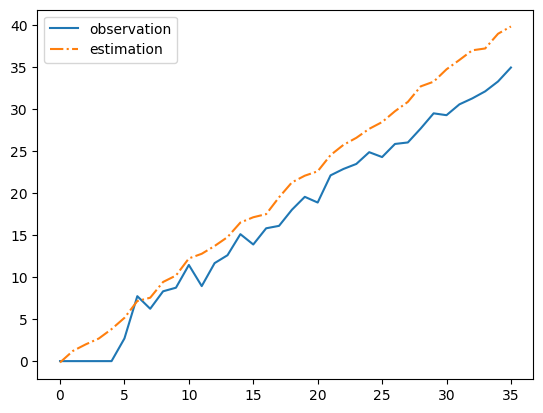

In [222]:
plt.plot(y_1, label ='observation');
plt.plot(imputation, '-.', label ='estimation');
plt.legend()
plt.show()